In [27]:
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot as plt
import cv2
import os

In [28]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [29]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

In [30]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [31]:
def to_one_hot(labels, num_classes=10):
    results = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [32]:
train_labels = to_one_hot(train_labels)
test_labels = to_one_hot(test_labels)

In [33]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [34]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [110]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

        # # For importing previously saved weights and biases
        #
        # if os.path.exists('weights_input_hidden_file.npy'):
        #     self.weights_input_hidden = np.load('weights_input_hidden_file.npy', allow_pickle=True)
        # else:
        #     self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        # if os.path.exists('biases_hidden_file.npy'):
        #     self.bias_hidden = np.load('biases_hidden_file.npy', allow_pickle=True)
        # else:
        #     self.bias_hidden = np.zeros((1, self.hidden_size))
        
        # if os.path.exists('weights_hidden_output_file.npy'):
        #     self.weights_hidden_output = np.load('weights_hidden_output_file.npy', allow_pickle=True)
        # else:
        #     self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        # if os.path.exists('biases_output_file.npy'):
        #     self.bias_output = np.load('biases_output_file.npy', allow_pickle=True)
        # else:
        #     self.bias_output = np.zeros((1, self.output_size))

        # Accuracy params
        self.epoch_array = []
        self.loss_array = []
        self.accuracy_array = []
        
    def forward(self, x):
        # Forward pass
        self.hidden_input = np.dot(x, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        
        self.output_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_input)
        
        return self.output
    
    def backward(self, x, y, output, learning_rate):
        # Backpropagation
        error = y - output
        
        output_delta = error * sigmoid_derivative(output)
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)
        
        self.weights_hidden_output += learning_rate * np.dot(self.hidden_output.T, output_delta)
        self.bias_output += learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        
        self.weights_input_hidden += learning_rate * np.dot(x.T, hidden_delta)
        self.bias_hidden += learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)
        
    def train(self, x, y, epochs, learning_rate):
        for epoch in range(epochs):
            for i in range(len(x)):
                # Forward pass
                input_data = x[i:i+1]
                target = y[i:i+1]
                output = self.forward(input_data)

                # Backward pass
                self.backward(input_data, target, output, learning_rate)

            loss = np.mean(np.square(y - self.forward(x)))
            print(f'Epoch {epoch}: Loss = {loss}')
            self.epoch_array.append(epoch)
            self.loss_array.append(loss)
            predictions = nn.forward(test_images)
            self.accuracy_array.append(np.mean(np.argmax(predictions, axis=1) == np.argmax(test_labels, axis=1)) * 100)

In [111]:
input_size = 784  # 28*28
hidden_size = 32
output_size = 10

In [112]:
nn = NeuralNetwork(input_size, hidden_size, output_size)

In [113]:
nn.train(train_images, train_labels, epochs=25, learning_rate=0.1)

Epoch 0: Loss = 0.03132996975422621
Epoch 1: Loss = 0.016594239148894074
Epoch 2: Loss = 0.013666928596839443
Epoch 3: Loss = 0.012230751006771233
Epoch 4: Loss = 0.011317740814458861
Epoch 5: Loss = 0.010592841327871031
Epoch 6: Loss = 0.01006800352915149
Epoch 7: Loss = 0.009589454017921231
Epoch 8: Loss = 0.009207255512754647
Epoch 9: Loss = 0.008861672536794103
Epoch 10: Loss = 0.008539726154164654
Epoch 11: Loss = 0.008301070080424862
Epoch 12: Loss = 0.008038487488894757
Epoch 13: Loss = 0.00779484729933723
Epoch 14: Loss = 0.007612703477229128
Epoch 15: Loss = 0.007427010075173298
Epoch 16: Loss = 0.00725961558295816
Epoch 17: Loss = 0.007113524829903969
Epoch 18: Loss = 0.006991517829112098
Epoch 19: Loss = 0.006886696029687447
Epoch 20: Loss = 0.006797502693428184
Epoch 21: Loss = 0.006700254242789478
Epoch 22: Loss = 0.0065930843650647735
Epoch 23: Loss = 0.006482289894640257
Epoch 24: Loss = 0.006384115028388292


<function matplotlib.pyplot.show(close=None, block=None)>

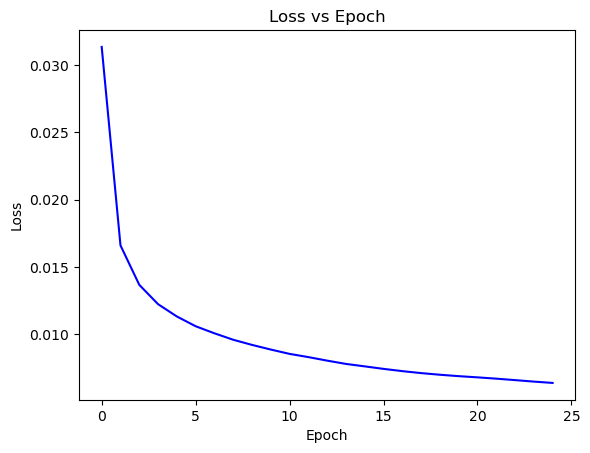

In [114]:
plt.plot(nn.epoch_array, nn.loss_array, 'blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

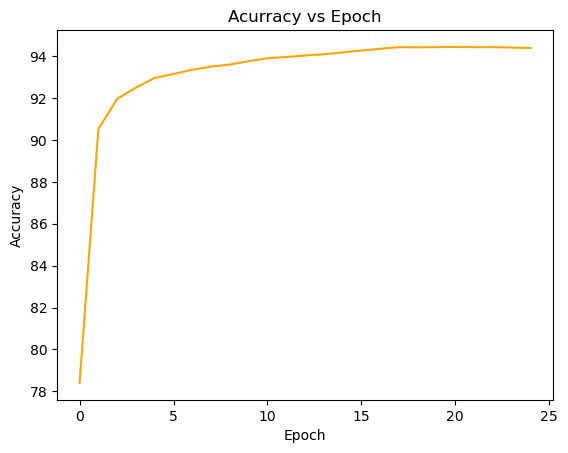

In [115]:
plt.plot(nn.epoch_array, nn.accuracy_array, 'orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Acurracy vs Epoch')
plt.show

In [116]:
predictions = nn.forward(test_images)
accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(test_labels, axis=1)) * 100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 94.39%


In [ ]:
# For saving weights and biases
np.save('biases_hidden_file.npy', nn.bias_hidden)
np.save('biases_output_file.npy', nn.bias_output)
np.save('weights_input_hidden_file.npy', nn.weights_input_hidden)
np.save('weights_hidden_output_file.npy', nn.weights_hidden_output)

In [117]:
for no in range(0,10):
    image_path = './' + str(no) + '.jpg'
    custom_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    custom_image_resized = cv2.resize(custom_image, (28, 28)) # Resize to 28x28
    custom_image_normalized = custom_image_resized.reshape((1, 28 * 28)) / 255  # Reshape and normalize
    prediction = nn.forward(custom_image_normalized)
    predicted_number = np.argmax(prediction)
    print("Predict number: ", predicted_number)

Predict number:  0
Predict number:  1
Predict number:  2
Predict number:  3
Predict number:  4
Predict number:  5
Predict number:  6
Predict number:  7
Predict number:  8
Predict number:  9
